In [282]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import math
import random
import matplotlib.pyplot as plt
import datetime
from treelib import Tree, Node
import warnings
warnings.filterwarnings('ignore')

# 读入数据所序列
row_data = pd.read_csv("F:/CourseData/数据挖掘/datamining20/trade_new.csv")
df = row_data[["sldatime", "vipno", "pluno","qty"]]
df.loc[:,"sldatime"] = df.loc[:,"sldatime"].apply(lambda x:x[:10]).tolist()
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)
df3 = df.copy(deep=True)
df4 = df.copy(deep=True)
df1

,sldatime,vipno,pluno,qty
0,2016-07-29,2900003115009,22002240,0.422
1,2016-06-08,2900001575201,34150006,1.000
2,2016-02-24,1591040161114,11054040,1.000
3,2016-05-21,1591016439575,27400855,0.001
4,2016-04-03,1591015027858,11110121,39.000
5,2016-07-23,2900000476042,15110032,1.000
6,2016-05-15,1590140305107,27400855,0.001
7,2016-07-23,2900000476042,15110032,1.000
8,2016-05-24,1590142197076,27400855,0.001
9,2016-06-13,2900001436410,15110032,1.000


In [283]:
# keyong 6227002180901670266 6227002180921663895 781924 13325038116
# 把pluno列取为第一、二、三、四级商品编号
df1["pluno"] = (df1["pluno"]/1000000).astype(int)
df2["pluno"] = (df2["pluno"]/100000).astype(int)
df3["pluno"] = (df3["pluno"]/10000).astype(int)
df4["pluno"] = (df4["pluno"]/1000).astype(int)
print(df3)

         sldatime          vipno  pluno     qty
0      2016-07-29  2900003115009   2200   0.422
1      2016-06-08  2900001575201   3415   1.000
2      2016-02-24  1591040161114   1105   1.000
3      2016-05-21  1591016439575   2740   0.001
4      2016-04-03  1591015027858   1111  39.000
5      2016-07-23  2900000476042   1511   1.000
6      2016-05-15  1590140305107   2740   0.001
7      2016-07-23  2900000476042   1511   1.000
8      2016-05-24  1590142197076   2740   0.001
9      2016-06-13  2900001436410   1511   1.000
10     2016-05-15  1591016439575   2740   0.001
11     2016-05-15  1591016439575   2740   0.001
12     2016-03-19  1591015454210   3282   1.000
13     2016-02-12  2900001437165   1011   1.000
14     2016-07-17  1590140304506   2740   0.001
15     2016-03-01  1591013766650   1011   1.000
16     2016-07-06  1591014637324   1511   1.000
17     2016-05-17  1590151103907   1511   1.000
18     2016-05-17  1590151103907   1511   1.000
19     2016-02-24  2900000890688   1011 

**读取需要的数据结束，接下来设计FTCTree**

In [284]:
df = df.sort_values(by=["sldatime"])
time_series = df["sldatime"].drop_duplicates()
time_series = time_series.reset_index(drop=True)
print(time_series)
df = df.sort_values(by=["vipno"])
vipno_series = df["vipno"].drop_duplicates()
vipno_series = vipno_series.reset_index(drop=True)
print(vipno_series)
df = df.sort_values(by=["pluno"])
pluno_series = df["pluno"].drop_duplicates()
pluno_series = pluno_series.reset_index(drop=True)
print(pluno_series)
df1 = df1.sort_values(by=["pluno"])
pluno_series1 = df1["pluno"].drop_duplicates()
pluno_series1 = pluno_series1.reset_index(drop=True)
df2 = df2.sort_values(by=["pluno"])
pluno_series2 = df2["pluno"].drop_duplicates()
pluno_series2 = pluno_series2.reset_index(drop=True)
df3 = df3.sort_values(by=["pluno"])
pluno_series3 = df3["pluno"].drop_duplicates()
pluno_series3 = pluno_series3.reset_index(drop=True)
df4 = df4.sort_values(by=["pluno"])
pluno_series4 = df4["pluno"].drop_duplicates()
pluno_series4 = pluno_series4.reset_index(drop=True)
# 分组，求和
print(df)
group_data1 = df1.groupby(["vipno","sldatime","pluno"])["qty"].sum()
group_data1
group_data2 = df2.groupby(["vipno","sldatime","pluno"])["qty"].sum()
group_data2
group_data3 = df3.groupby(["vipno","sldatime","pluno"])["qty"].sum()
group_data3
group_data4 = df4.groupby(["vipno","sldatime","pluno"])["qty"].sum()
group_data4
group_data = df.groupby(["vipno","sldatime","pluno"])["qty"].sum()
print(group_data)
#记录：用户486个，plu一级18个，plu二级94个，plu三级329个，plu四级979个 购买时间最晚7月31日，最早2月1日

0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
5      2016-02-06
6      2016-02-07
7      2016-02-08
8      2016-02-09
9      2016-02-10
10     2016-02-11
11     2016-02-12
12     2016-02-13
13     2016-02-14
14     2016-02-15
15     2016-02-16
16     2016-02-17
17     2016-02-18
18     2016-02-19
19     2016-02-20
20     2016-02-21
21     2016-02-22
22     2016-02-23
23     2016-02-24
24     2016-02-25
25     2016-02-26
26     2016-02-27
27     2016-02-28
28     2016-02-29
29     2016-03-01
          ...    
152    2016-07-02
153    2016-07-03
154    2016-07-04
155    2016-07-05
156    2016-07-06
157    2016-07-07
158    2016-07-08
159    2016-07-09
160    2016-07-10
161    2016-07-11
162    2016-07-12
163    2016-07-13
164    2016-07-14
165    2016-07-15
166    2016-07-16
167    2016-07-17
168    2016-07-18
169    2016-07-19
170    2016-07-20
171    2016-07-21
172    2016-07-22
173    2016-07-23
174    2016-07-24
175    2016-07-25
176    201

**这里是用来评判该商品选取几级结构的函数**

In [285]:
def judgeTimeLevel(a):
    delta = datetime.datetime(2016,7,31)-datetime.datetime(int(a[0:4]),int(a[5:7]),int(a[8:10]))
#     0全部显示
    if delta < datetime.timedelta(days=30):
        return 0
#     1显示到四级
    elif delta < datetime.timedelta(days=60):
        return 1
#     2显示到3级
    elif delta < datetime.timedelta(days=120):
        return 2
#     3显示到2级
    else:
        return 3

In [286]:
class Point:
    def __init__(self, time, kind, qty):
        self.time = time
        self.kind = kind
        self.qty = qty

In [287]:
class Point1:
    def __init__(self, kind, qty):
        self.kind = kind
        self.qty = qty

**为用户建立一个FTC树**

In [288]:
tree_array = []
for i in vipno_series:
    tree = Tree()
    tree.create_node("Root","root")
    data = group_data[i]
    point_array = []
    for p,q in data.items():
        time = p[0]
        kind = p[1]
        kind1 = int(kind/1000000)
        kind2 = int(kind/100000)
        kind3 = int(kind/10000)
        kind4 = int(kind/1000)
        qty = q
        showLevel = judgeTimeLevel(time)
        print("time: " + str(time) + " level: " + str(showLevel))
        if showLevel == 0:
            if kind1 not in point_array:
                point_array.append(kind1)
                tree.create_node(kind1,kind1,parent="root",data=Point1(kind1,qty))
            else:
                tree.nodes[kind1].data.time = time
                tree.nodes[kind1].data.qty += qty
            if kind2 not in point_array:
                point_array.append(kind2)
                tree.create_node(kind2,kind2,parent=kind1,data=Point1(kind2,qty))
            else:
                tree.nodes[kind2].data.time = time
                tree.nodes[kind2].data.qty += qty
            if kind3 not in point_array:
                point_array.append(kind3)
                tree.create_node(kind3,kind3,parent=kind2,data=Point1(kind3,qty))
            else:
                tree.nodes[kind3].data.time = time
                tree.nodes[kind3].data.qty += qty
            if kind4 not in point_array:
                point_array.append(kind4)
                tree.create_node(kind4,kind4,parent=kind3,data=Point1(kind4,qty))
            else:
                tree.nodes[kind4].data.time = time
                tree.nodes[kind4].data.qty += qty
            if kind not in point_array:
                point_array.append(kind)
                tree.create_node(kind,kind,parent=kind4,data=Point1(kind,qty))
            else:
                tree.nodes[kind].data.time = time
                tree.nodes[kind].data.qty += qty
        elif showLevel == 1:
            if kind1 not in point_array:
                point_array.append(kind1)
                tree.create_node(kind1,kind1,parent="root",data=Point1(kind1,qty))
            else:
                tree.nodes[kind1].data.time = time
                tree.nodes[kind1].data.qty += qty
            if kind2 not in point_array:
                point_array.append(kind2)
                tree.create_node(kind2,kind2,parent=kind1,data=Point1(kind2,qty))
            else:
                tree.nodes[kind2].data.time = time
                tree.nodes[kind2].data.qty += qty
            if kind3 not in point_array:
                point_array.append(kind3)
                tree.create_node(kind3,kind3,parent=kind2,data=Point1(kind3,qty))
            else:
                tree.nodes[kind3].data.time = time
                tree.nodes[kind3].data.qty += qty
            if kind4 not in point_array:
                point_array.append(kind4)
                tree.create_node(kind4,kind4,parent=kind3,data=Point1(kind4,qty))
            else:
                tree.nodes[kind4].data.time = time
                tree.nodes[kind4].data.qty += qty
        elif showLevel == 2:
            if kind1 not in point_array:
                point_array.append(kind1)
                tree.create_node(kind1,kind1,parent="root",data=Point1(kind1,qty))
            else:
                tree.nodes[kind1].data.time = time
                tree.nodes[kind1].data.qty += qty
            if kind2 not in point_array:
                point_array.append(kind2)
                tree.create_node(kind2,kind2,parent=kind1,data=Point1(kind2,qty))
            else:
                tree.nodes[kind2].data.time = time
                tree.nodes[kind2].data.qty += qty
            if kind3 not in point_array:
                point_array.append(kind3)
                tree.create_node(kind3,kind3,parent=kind2,data=Point1(kind3,qty))
            else:
                tree.nodes[kind3].data.time = time
                tree.nodes[kind3].data.qty += qty
        elif showLevel == 3:
            if kind1 not in point_array:
                point_array.append(kind1)
                tree.create_node(kind1,kind1,parent="root",data=Point1(kind1,qty))
            else:
                tree.nodes[kind1].data.time = time
                tree.nodes[kind1].data.qty += qty
            if kind2 not in point_array:
                point_array.append(kind2)
                tree.create_node(kind2,kind2,parent=kind1,data=Point1(kind2,qty))
            else:
                tree.nodes[kind2].data.time = time
                tree.nodes[kind2].data.qty += qty
    tree_array.append(tree)
    tree.show()


time: 2016-04-04 level: 2
time: 2016-04-04 level: 2
time: 2016-04-04 level: 2
time: 2016-04-04 level: 2
time: 2016-04-04 level: 2
time: 2016-04-04 level: 2
time: 2016-04-04 level: 2
time: 2016-04-04 level: 2
time: 2016-05-01 level: 2
time: 2016-05-01 level: 2
time: 2016-05-01 level: 2
time: 2016-05-01 level: 2
time: 2016-06-01 level: 2
time: 2016-06-01 level: 2
time: 2016-06-01 level: 2
time: 2016-06-01 level: 2
time: 2016-07-16 level: 0
time: 2016-07-30 level: 0
time: 2016-07-30 level: 0
time: 2016-07-30 level: 0
time: 2016-07-30 level: 0
time: 2016-07-30 level: 0
time: 2016-07-30 level: 0
Root
├── 10
│   └── 101
│       ├── 1011
│       └── 1013
├── 11
│   ├── 113
│   │   └── 1130
│   │       └── 11302
│   │           └── 11302032
│   └── 115
│       └── 1153
├── 14
│   ├── 140
│   │   ├── 1401
│   │   ├── 1405
│   │   └── 1408
│   │       └── 14082
│   │           └── 14082002
│   ├── 141
│   │   └── 1410
│   │       └── 14101
│   │           └── 14101028
│   └── 144
│       └── 144

**FTC树全部构建完成，接下来构建交集和并集树**

In [289]:
def IR(tree1, tree2):
    result = Tree()
    result.create_node("Root","root")
    for i in tree1.nodes:
        for j in tree2.nodes:
            if i==j and i!="root":
                result.create_node(i,i,parent=tree1.nodes[i].predecessor(tree1.identifier),data=Point1(i,tree1.nodes[i].data.qty + tree2.nodes[i].data.qty))
    return result


def UR(tree1, tree2):
    result = Tree()
    result.create_node("Root","root")
    i_cluster = []
    ii_cluster = []
    jj_cluster = []
    for i in tree1.nodes:
        if i != "root":
            ii_cluster.append(i)
    for j in tree2.nodes:
        if j != "root":
            if j in ii_cluster:
                i_cluster.append(j)
                ii_cluster.remove(j)
            else:
                jj_cluster.append(j)
    for i in i_cluster:
        result.create_node(i,i,parent=tree1.nodes[i].predecessor(tree1.identifier),data=Point1(i,tree1.nodes[i].data.qty + tree2.nodes[i].data.qty))
    for i in ii_cluster:
            result.create_node(i,i,parent=tree1.nodes[i].predecessor(tree1.identifier),data=Point1(i,tree1.nodes[i].data.qty))
    for i in jj_cluster:
            result.create_node(i,i,parent=tree2.nodes[i].predecessor(tree2.identifier),data=Point1(i,tree2.nodes[i].data.qty))  
    return result

**接下来要计算两棵FTC树之间的距离**

In [290]:
def FTC_dist(tree1, tree2):
    i_tree = IR(tree1, tree2)
#     i_tree.show()
    u_tree = UR(tree1, tree2)
#     u_tree.show()
    v1 = 0
    n1 = 0
    v2 = 0
    n2 = 0
    v3 = 0
    n3 = 0
    v4 = 0
    n4 = 0
    v5 = 0
    n5 = 0
    div_root = 0
    for i in u_tree.nodes["root"].successors(u_tree.identifier):
        div_root += u_tree.nodes[i].data.qty
    for i in i_tree.nodes:
        if i != "root":
            dep = len(str(i)) - 1
#             print("i: " + str(i) + "dep: " + str(dep))
            if dep == 1:
                div = div_root
#                 print("div: " + str(div))
                if div != 0:
                    v1 += i_tree.nodes[i].data.qty / div
#                     print("qty: " + str(i_tree.nodes[i].data.qty) + "v1_now: " + str(v1))
                else:
                    v1 = 0
                n1 += 1 
#                 print("n1_now: " + str(n1))
            elif dep == 2:
                div = 0
                for j in u_tree.get_node(u_tree.nodes[i].predecessor(u_tree.identifier)).successors(u_tree.identifier):
                    div += u_tree.nodes[j].data.qty
#                 print("div: " + str(div))
                if div != 0:
                    v2 += i_tree.nodes[i].data.qty / div
#                     print("qty: " + str(i_tree.nodes[i].data.qty) + "v2_now: " + str(v2))
                else:
                    v2 = 0
                n2 += 1
#                 print("n2_now: " + str(n2))
            elif dep == 3:
                div = 0
                for j in u_tree.get_node(u_tree.nodes[i].predecessor(u_tree.identifier)).successors(u_tree.identifier):
                    div += u_tree.nodes[j].data.qty
#                 print("div: " + str(div))
                if div != 0:
                    v3 += i_tree.nodes[i].data.qty / div
#                     print("qty: " + str(i_tree.nodes[i].data.qty) + "v3_now: " + str(v3))
                else:
                    v3 = 0
                n3 += 1
#                 print("n3_now: " + str(n3))
            elif dep == 4:
                div = 0
                for j in u_tree.get_node(u_tree.nodes[i].predecessor(u_tree.identifier)).successors(u_tree.identifier):
                    div += u_tree.nodes[j].data.qty
#                 print("div: " + str(div))
                if div != 0:
                    v4 += i_tree.nodes[i].data.qty / div
#                     print("qty: " + str(i_tree.nodes[i].data.qty) + "v4_now: " + str(v4))
                else:
                    v4 = 0
                n4 += 1
#                 print("n4_now: " + str(n4))
            else:
                div = 0
                for j in u_tree.get_node(u_tree.nodes[i].predecessor(u_tree.identifier)).successors(u_tree.identifier):
                    div += u_tree.nodes[j].data.qty
#                 print("div: " + str(div))
                if div != 0:
                    v5 += i_tree.nodes[i].data.qty / div
#                     print("qty: " + str(i_tree.nodes[i].data.qty) + "v5_now: " + str(v5))
                else:
                    v5 = 0
                n5 += 1
#                 print("n5_now: " + str(n5))
#     print("v1: " + str(v1))
#     print("v2: " + str(v2))
#     print("v3: " + str(v3))
#     print("v4: " + str(v4))
#     print("v5: " + str(v5))
#     print("n1: " + str(n1))
#     print("n2: " + str(n2))
#     print("n3: " + str(n3))
#     print("n4: " + str(n4))
#     print("n5: " + str(n5))
    if n1 != 0:
        sim1 = v1/n1
#         print(sim1)
    else:
        sim1 = 0
    if n2 != 0:
        sim2 = v2/n2
#         print(sim2)
    else:
        sim2 = 0
    if n3 != 0:
        sim3 = v3/n3
#         print(sim3)
    else:
        sim3 = 0
    if n4 != 0:
        sim4 = v4/n4
#         print(sim4)
    else:
        sim4 = 0
    if n5 != 0:
        sim5 = v5/n5
#         print(sim5)
    else:
        sim5 = 0
    if sim2 == 0:
        result = 1 - sim1
    elif sim3 == 0:
        result = 1 - (sim1/3 + sim2*2/3)
    elif sim4 == 0:
        result = 1 - (sim1/6 + sim2*2/6 + sim3*3/6)
    elif sim5 == 0:
        result = 1 - (sim1/10 + sim2*2/10 + sim3*3/10 + sim4*4/10)
    else:
        result = 1 - (sim1/15 + sim2*2/15 + sim3*3/15 + sim4*4/15 + sim5*5/15)
    return result

In [266]:
tree1 = Tree()
tree2 = Tree()
tree1.create_node("Root","root")
tree2.create_node("Root","root")
tree1.create_node(10,10,parent="root",data=Point1(10, 2))
tree1.create_node(101,101,parent=10,data=Point1(101, 2))
tree1.create_node(1012,1012,parent=101,data=Point1(1012, 2))
tree1.create_node(10128,10128,parent=1012,data=Point1(10128, 1))
tree1.create_node(10129,10129,parent=1012,data=Point1(10129, 1))
tree1.create_node(12,12,parent="root",data=Point1(12, 1))
tree1.create_node(122,122,parent=12,data=Point1(122, 1))
tree2.create_node(10,10,parent="root",data=Point1(10, 2))
tree2.create_node(101,101,parent=10,data=Point1(101, 2))
tree2.create_node(1012,1012,parent=101,data=Point1(1012, 1))
tree2.create_node(10128,10128,parent=1012,data=Point1(10128, 1))
tree2.create_node(1013,1013,parent=101,data=Point1(1013, 1))
tree2.create_node(13,13,parent="root",data=Point1(13, 1))
test_tree_array = [tree1, tree2]
FTC_dist(tree1,tree2)

0.2416666666666667

<BarContainer object of 486 artists>

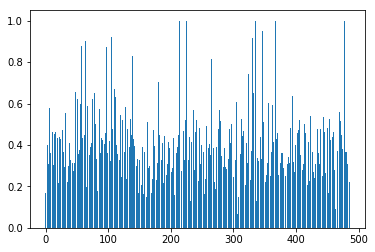

In [330]:
distance = []
for i in range(len(tree_array)):
    distance.append(FTC_dist(tree_array[0], tree_array[i]))
plt.bar(range(len(tree_array)), distance)

In [291]:
len(UTREE(test_tree_array).leaves())

正在合并大并集树
合并完成


5

**接下来是质心算法**

In [292]:
def UTREE(tree_array):
    print("正在合并大并集树")
    utree = tree_array[0]
    for i in range(len(tree_array) - 1):
        utree = UR(utree, tree_array[i+1])
    print("合并完成")
#     utree.show()
    return utree

In [293]:
def updateTree(tree, freq):
    flag = []
    for i in tree.nodes:
        if i != "root":
            if tree.nodes[i].data.qty < freq:
                flag.append(i)
    for i in flag:
        if tree.get_node(i):
            tree.remove_node(i)
    return tree

In [312]:
def GetCT(tree_array):
    print("正在计算树的质心")
    ct = Tree()
    utree = UTREE(tree_array)
    max_freq = 0
    sum_freq = 0
    freq = 1
    mindist = 999999
    num_avg_nodes = 0
    for q in tree_array:
        num_avg_nodes += len(q.all_nodes())
    num_avg_nodes /= len(tree_array)
    for i in utree.nodes:
        if i != "root":
            dep = len(str(i)) - 1
            if dep == 1:
                if utree.nodes[i].data.qty > max_freq:
                    max_freq = utree.nodes[i].data.qty
            sum_freq += utree.nodes[i].data.qty
    avg_freq = sum_freq / (len(utree.nodes) - 1)
    while freq <= max_freq:
        utree = updateTree(utree, freq)
        if len(utree.all_nodes()) <= num_avg_nodes:
            break
        dist = 0
        for i in tree_array:
            dist += FTC_dist(i,utree)
        if dist < mindist:
            mindist = dist
            ct = utree
        freq = freq + avg_freq
    print("计算完成")
    return ct

**FTC树的kmeans算法**

In [294]:
def initCentroids(dataSet, k):#dataSet-数据点数组 k-设置的质心数
    #初始化质心 
    print("正在选择随机质心")
    centroids = []
    index = random.sample(range(0, len(dataSet)), k)#index-在零到数据点个数间的随机数
    print(index)
    for i in range(len(index)):
        centroids.append(dataSet[index[i]])
        #将随机质心存储入centroids
    print("选择完成")
    return centroids

In [323]:
def kmeans(dataSet, k):
    #k-means算法的核心函数
    numSamples = len(dataSet)#数据点个数为数据点数组的行数
    label = np.zeros(numSamples)
    clusterChanged = True#clusterChanged-表示是否需要重新分组的布尔值判定量
    
    centroids = initCentroids(dataSet, k)#初始化质心
    step = 0
#     print(centroids)
    while clusterChanged:#需要重新分组时
        clusterChanged = False#重置判定量为假
        for i in range(numSamples):#遍历所有数据点
            minDist = 100000.0#minDist-最小的数据点与质心的距离
            minIndex = 0#minIndex-最小的链接地址
            for j in range(k):
                #计算每个数据点到哪个质心的距离最小，及记录是哪一个质心
                distance = FTC_dist(centroids[j], dataSet[i])#distance-暂时存放数据点到质心的距离，这里是FTC距离
                if distance < minDist:
                    minDist = distance
                    minIndex = j
            if label[i] != minIndex:#当该数据点所隶属的质心与最小链接地址不同时更新点中的数据
                clusterChanged = True#重置判定量为真
                label[i] = minIndex
        print(label)
#         print(label)
        for j in range(k):#由新的隶属关系中更新质心位置
            pointsInCluster = []
            for m in range(numSamples):
                if label[m] == j:
                    pointsInCluster.append(dataSet[m])
#                 print("m: " + str(m) + " label[m]: " + str(label[m]))                   
#             print(pointsInCluster)
            centroids[j] = GetCT(pointsInCluster)
#         print(centroids)
        step += 1
        if step >= 40:
            break
    print("分类完成")
    tree_array_array = []
    for i in range(k):
        tree_array = []
        for j in range(numSamples):
            if label[j] == i:
                tree_array.append(dataSet[j])
        tree_array_array.append(tree_array)
    return tree_array_array            

**BIC算法**

In [296]:
# Ni该簇用户数，k簇数量，ct质心树，C该簇树列表
def variance(Ni,ct,k,C):
    print("正在计算方差")
    result = 1/(Ni-k)
    sum_dist = 0
    for i in C:
        sum_dist += math.pow(FTC_dist(i,ct),2)
    result *= sum_dist
    print("variance: " + str(result))
    return result    

In [297]:
# N用户数，k簇数，D该簇商品数，ct质心，C该簇树列表
def L(N,D,C,ct,k):
    print("正在计算L")
    sum_num = 0
    for i in range(k):
        sum_num += N[i] * math.log(N[i])- N[i]*math.log(sum(N)) - N[i]/2*math.log(2*math.pi) - N[i]*D/2* math.log(variance(N[i],ct[i],k,C)) - (N[i] - k)/2
    result = sum_num 
    print("计算完成")
    return result

In [298]:
def BIC(C, array):
    print("BIC启动")
    #k=1
    N = [len(C)]
    D = len(UTREE(C).leaves())
    ct = [GetCT(C)]
    ct[0].show()
    l = L(N,D,C,ct,1)
    sub = 1/2*(D+1)*math.log(1)
    print("N: " + str(N) + " D: " + str(D) + " l: " + str(l) + " sub: " + str(sub))
    result1 = l - sub
    print("result1: " + str(result1))
    # k=2
    tree_array_array = kmeans(C, 2)
    tree_array1 = tree_array_array[0]
    tree_array2 = tree_array_array[1]
    N1 = [len(tree_array1),len(tree_array2)]
    ct = [GetCT(tree_array1),GetCT(tree_array2)]
    l1 = L(N1,D,C,ct,2)
    sub1 = (D+1)*math.log(2)
    result2 = l1 - sub1
    print("result1: " + str(result1))
    print("result2: " + str(result2))
    if result2 <= result1:
        print("无需分组")
        array.append(C)
    else:
        BIC(tree_array1, array)
        BIC(tree_array2, array)

In [324]:
result_array = []
a = kmeans(tree_array, 2)
for i in a:
    BIC(i, result_array)
print(result_array)

正在选择随机质心
[6, 110]
选择完成
[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 

In [327]:
k = len(result_array)
k

2

In [319]:
def getSC(tree_array, result_array):
    sum_number = 0
    for i in range(len(tree_array)):
        ai = 0
        bi = 0
        anum = 0
        bnum = 0
        for j in range(len(tree_array)):
            flag = False
            for m in range(len(result_array)):
                if tree_array[i] in result_array[m] and tree_array[j] in result_array[m]:
                    ai += FTC_dist(tree_array[i], tree_array[j])
                    anum += 1
                    flag = True
                    break
            if flag == False:
                bi += FTC_dist(tree_array[i], tree_array[j])
                bnum += 1
        ai = ai / anum
        bi = bi / bnum
        sum_number += (bi - ai) / max(ai, bi)
    return sum_number / len(tree_array)

In [320]:
def getCP(tree_array, result_array):
    k = len(result_array)
    cpnum = 0
    for i in result_array:
        distance = 0
        ct = GetCT(i)
        num = 0
        for j in range(len(tree_array)):
            if tree_array[j] in i:
                distance += FTC_dist(tree_array[j], ct)
                num += 1
        cpnum += distance/num
    return cpnum/k

In [329]:
sc = getSC(tree_array, result_array)
cp = getCP(tree_array, result_array)

正在计算树的质心
正在合并大并集树
合并完成
计算完成
正在计算树的质心
正在合并大并集树
合并完成
计算完成


In [328]:
print(sc)
print(cp)

0.03001777457340002
0.28558352013812394
